In [113]:
## Cargar las librerias para el trato de la data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import RocCurveDisplay

## Leer los datos del archivo csv
work5 = pd.read_csv('titanic.csv')

## Mostar dataset
print()
print("Confirmar lectura de Dataset y mostrar en pantalla")
print()
work5.head()


Confirmar lectura de Dataset y mostrar en pantalla



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
## Contar registros iniciales
count_work5 = len(work5)
print (f"La cantidad de registros iniciales es: {count_work5}")

La cantidad de registros iniciales es: 891


In [115]:
## Como vemos datos faltantes a primera vista, vamos confirmar con codigo:
## Buscar datos nulos en el df
resp1 = work5.isnull().any().any()
print()
print ("Evaluando valores faltantes en el df")
print()
print("¿Existen valores nulos en el df?")
print(f"Rta: {resp1}")
print()


Evaluando valores faltantes en el df

¿Existen valores nulos en el df?
Rta: True



In [116]:
## Reemplanzando valores faltantes en el df.
work5 = work5.fillna(work5.mode().iloc[0])

## Validando el df
work5.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,B96 B98,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,B96 B98,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,B96 B98,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,B96 B98,C


In [117]:
## Reprocesando validacion de datos nulos en el df
resp1 = work5.isnull().any().any()
print()
print ("Evaluando valores faltantes en el df")
print()
print("¿Existen valores nulos en el df?")
print(f"Rta: {resp1}")
print()


Evaluando valores faltantes en el df

¿Existen valores nulos en el df?
Rta: False



In [118]:
## Validar cantidad de registros luego de tratamiento
count_work5 = len(work5)
print (f"La cantidad de registros luego de tratamiento es: {count_work5}")

La cantidad de registros luego de tratamiento es: 891


In [119]:
# Descripción de los datos
work5.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

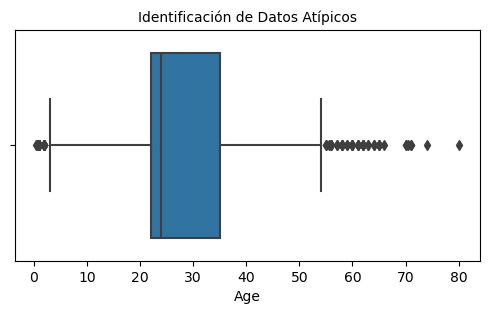

In [120]:
## Procesando validacion de datos atipicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=work5['Age'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [ ]:
## En esta validacion se observa que la figura nos muestra datos atipicos, que desde mi percepcion no aplican para catalogarse como datos atipicos. ##

In [122]:
## Validando datos null
work5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [123]:
## Contar valores de la columna a predcir
work5['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [124]:
## Extraemos los datos que vamos a analizar
## Tenemos que tener en cuenta que el modelo funciona unicamente con valores numericos, por lo cual es necesario retirar valores no numericos
X = work5.drop(['Survived','Name','Sex','Ticket', 'Cabin', 'Embarked', 'PassengerId'], axis=1)
Y = work5['Survived']

# Asegurar que haya al menos 2 ejemplos por clase en ambos conjuntos de datos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [126]:
## Crear modelo de regresion logistica
modelo_regresion = LogisticRegression(solver = "liblinear", class_weight='balanced')
modelo_regresion.fit (X_train , Y_train)

## Prediccion de los datos de prueba
prediccion = modelo_regresion.predict(X_test)

## Mostrar prediccion
print (prediccion)

[0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0
 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0
 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0
 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0
 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1
 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1
 1]


In [139]:
## Evaluando el rendimiento del modelo
print(classification_report(Y_test,prediccion))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       139
           1       0.60      0.62      0.61        84

    accuracy                           0.70       223
   macro avg       0.69      0.69      0.69       223
weighted avg       0.71      0.70      0.70       223



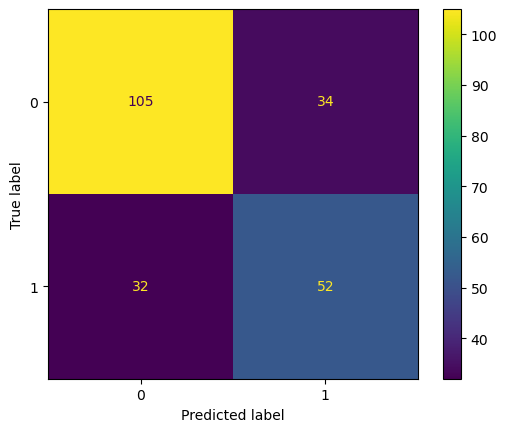

In [140]:
## Creando instancia o matriz de confusion
cm=confusion_matrix(Y_test,prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

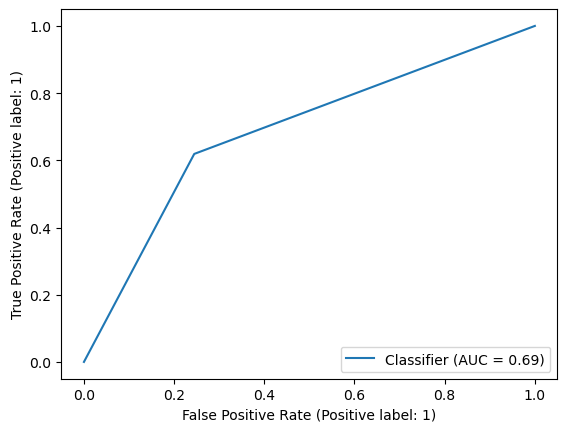

In [141]:
## Evaluando el rendimiento del modelo
RocCurveDisplay.from_predictions(Y_test, prediccion)
plt.show()